Import Necessary Modules

In [102]:
import numpy as np
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


Load The Headlines

In [103]:
headlines = pd.read_csv('redditData/headlines.csv' , index_col=None).to_numpy()

In [104]:
print(headlines[0:5])

[['Biden Appointees Just Made It Easier For Workers To Form Unions']
 ['The surrogates: Trump’s strategy for campaigning from court']
 ['Abortion rights at heart of Democrats’ 2024 US election campaign']
 ["Trump campaign aide told police officers to 'go hang yourself' at Jan. 6 riot"]
 ['Arizona GOP continues eating its own in defense of Kari Lake and MAGA mania']]


Initialize Sentiment Intensity Analyzer And Map It On Headlines

In [105]:
sia = SIA()
results = []

for line in headlines:
    pol_score = sia.polarity_scores(line[0])
    pol_score['headline'] = line[0]
    results.append(pol_score)

print(results[:3])

[{'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'compound': 0.4215, 'headline': 'Biden Appointees Just Made It Easier For Workers To Form Unions'}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'headline': 'The surrogates: Trump’s strategy for campaigning from court'}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'headline': 'Abortion rights at heart of Democrats’ 2024 US election campaign'}]


Store Results In Dataframe

In [106]:
df = pd.DataFrame.from_records(results)
df.head()

,neg,neu,pos,compound,headline
0,0.000,0.781,0.219,0.4215,Biden Appointees Just Made It Easier For Worke...
1,0.000,1.000,0.000,0.0000,The surrogates: Trump’s strategy for campaigni...
2,0.000,1.000,0.000,0.0000,Abortion rights at heart of Democrats’ 2024 US...
3,0.231,0.769,0.000,-0.5574,Trump campaign aide told police officers to 'g...
4,0.000,0.897,0.103,0.1280,Arizona GOP continues eating its own in defens...


Labeling The Headlines Through Threshold Conditionals

In [107]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df.head()

,neg,neu,pos,compound,headline,label
0,0.000,0.781,0.219,0.4215,Biden Appointees Just Made It Easier For Worke...,1
1,0.000,1.000,0.000,0.0000,The surrogates: Trump’s strategy for campaigni...,0
2,0.000,1.000,0.000,0.0000,Abortion rights at heart of Democrats’ 2024 US...,0
3,0.231,0.769,0.000,-0.5574,Trump campaign aide told police officers to 'g...,-1
4,0.000,0.897,0.103,0.1280,Arizona GOP continues eating its own in defens...,0


Saving The Labeled Dataframe In CSV File

In [108]:
df2 = df[['headline', 'label']]
df2.to_csv('redditData/reddit_headlines_labels.csv', mode='a', encoding='utf-8', index=False)

Final Results

In [109]:
print("Positive headlines:\n")
print(list(df[df['label'] == 1].headline)[:5])

print("\nNegative headlines:\n")
print(list(df[df['label'] == -1].headline)[:5])

Positive headlines:

['Biden Appointees Just Made It Easier For Workers To Form Unions', 'Biden’s Bold Move on Drug Prices Gives GOP Two Choices: Change the Subject, or Lie', 'In the abortion debate, honesty matters', 'Why Biden and Trump need each other in order to win in 2024', '"We call that kind of love a cult": Experts on the latest disturbing poll of Trump supporters - New poll reveals that members of the MAGA cult trust Trump most: He "provides the kind of love they crave"']

Negative headlines:

["Trump campaign aide told police officers to 'go hang yourself' at Jan. 6 riot", '187,000 jobs added in August as unemployment rises to 3.8%', 'Ted Cruz Might Be the Most Gullible Person on the Internet', 'President Biden has beaten Big Pharma with drug price negotiations: White House', 'Biden is widely seen as too old for office, an AP-NORC poll finds. Trump has problems of his own']


In [110]:
print('Actual Values')
print(df.label.value_counts(), end='\n\n')

print('Percentage Values')
print(df.label.value_counts(normalize=True) * 100)

Actual Values
 0    414
-1    307
 1    194
Name: label, dtype: int64

Percentage Values
 0    45.245902
-1    33.551913
 1    21.202186
Name: label, dtype: float64


Visualizing The Results

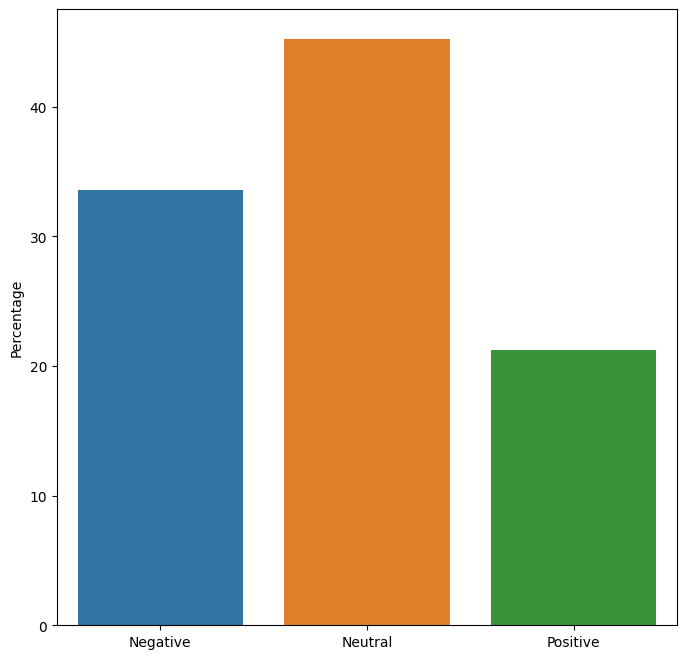

In [111]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")
plt.show()